Importation des librairies de bases

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

Importation des modèles

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

Importations des métriques

In [5]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

Importation du jeu de données

In [6]:
data=pd.read_csv('N_RECODAGE.csv')
data.head()

,Income,capital,Age,Pays_natal,Heures_par_sem,Education,Emploi_Secteur,Statut_marital,Relation_familiale,Race,Sexe,Occupation
0,<=50K,2174,29-39 Ans,Etats_Unis,<=40H,Superieure_plus,Gouvernement,Seul,Autre,Blanc,Homme,Administration
1,<=50K,0,>=50 Ans,Etats_Unis,<=40H,Superieure_plus,Prive,Marie,Conjoint,Blanc,Homme,Administration
2,<=50K,0,29-39 Ans,Etats_Unis,<=40H,Lycee,Prive,Divorce,Autre,Blanc,Homme,Artisan_Repara
3,<=50K,0,>=50 Ans,Etats_Unis,<=40H,Lycee,Prive,Marie,Conjoint,Noir,Homme,Artisan_Repara
4,<=50K,0,<=28 Ans,Autre_pays,<=40H,Superieure_plus,Prive,Marie,Conjoint,Noir,Femme,Administration


Découpage du jeu de données et suppression de la race

In [7]:
data=data.drop(['Occupation'], axis=1)
data=data.drop(['Pays_natal'], axis=1)
data=data.drop(['Emploi_Secteur'], axis=1)
data=data.drop(['Race'], axis=1)
x=data.drop(['Income'], axis=1)
y=data['Income']
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

Création d'un jeu de données pour les modèles ne prenant pas en compte les variables catégorielles

In [8]:
cat_columns = ['Age','Heures_par_sem','Education','Statut_marital','Relation_familiale','Sexe']
num_columns = ['capital']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_columns),
        ('num', 'passthrough', num_columns)
    ],
    remainder='drop'
)

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.fit_transform(X_test)

Centrée réduire le capital et suppression valeur=99999

In [9]:
data['capital'].replace(99999, np.nan, inplace=True)
data.dropna(subset=['capital'], inplace=True)

scaler = StandardScaler()
data_to_scale=data[['capital']]
data['capital'] = scaler.fit_transform(data_to_scale)

print(data)

      Income   capital        Age Heures_par_sem        Education  \
0      <=50K  0.639202  29-39 Ans          <=40H  Superieure_plus   
1      <=50K -0.193158   >=50 Ans          <=40H  Superieure_plus   
2      <=50K -0.193158  29-39 Ans          <=40H            Lycee   
3      <=50K -0.193158   >=50 Ans          <=40H            Lycee   
4      <=50K -0.193158   <=28 Ans          <=40H  Superieure_plus   
...      ...       ...        ...            ...              ...   
32556  <=50K -0.193158   <=28 Ans          <=40H       Superieure   
32557   >50K -0.193158  40-49 Ans          <=40H            Lycee   
32558  <=50K -0.193158   >=50 Ans          <=40H            Lycee   
32559  <=50K -0.193158   <=28 Ans          <=40H            Lycee   
32560   >50K  5.559082   >=50 Ans          <=40H            Lycee   

      Statut_marital Relation_familiale   Sexe  
0               Seul              Autre  Homme  
1              Marie           Conjoint  Homme  
2            Divorce    

Modèles

In [10]:
tree=DecisionTreeClassifier()
forest=RandomForestClassifier()
ada=AdaBoostClassifier()
knn=KNeighborsClassifier()
mlp=MLPClassifier()
svc=SVC()
log=LogisticRegression()

Ajout des hyper-paramètres

In [11]:
params={
     "max_depth" : [1, 2, 3, 4],
     "min_samples_leaf" : [3, 5, 7, 9, 11],
     "min_samples_split" : [8, 9, 10, 11, 12 ,13, 14]
     }

tree = GridSearchCV(tree, params,refit=True, n_jobs=4, cv=5)

In [12]:
params={
     "n_neighbors" : [1, 3, 5, 7, 9]
     }

knn = GridSearchCV(knn, params,refit=True, n_jobs=4, cv=5)

Entraînement des modèles

In [13]:
tree.fit(X_train_encoded, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [3, 5, 7, 9, 11],
                         'min_samples_split': [8, 9, 10, 11, 12, 13, 14]})

In [14]:
forest.fit(X_train_encoded, y_train)

RandomForestClassifier()

In [15]:
ada.fit(X_train_encoded,y_train)

AdaBoostClassifier()

In [16]:
knn.fit(X_train_encoded,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [17]:
mlp.fit(X_train_encoded,y_train)

MLPClassifier()

In [18]:
svc.fit(X_train_encoded,y_train)

SVC()

In [19]:
log.fit(X_train_encoded,y_train)

C:\Users\AxelV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Choix des paramètres retenus

In [20]:
print("Arbre: ",tree.best_params_)

Arbre:  {'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 8}


In [21]:
print("Knn: ",knn.best_params_)

Knn:  {'n_neighbors': 5}


Score des modèles DecisionTreeClassifier

In [23]:
print("Accuracy apprentissage: ",tree.score(X_train_encoded, y_train))

y_pred_tree = tree.predict(X_test_encoded)

print("Accuracy: ",accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree, pos_label='>50K'))
print("Recall:", recall_score(y_test, y_pred_tree, pos_label='>50K'))
print("F1:", f1_score(y_test, y_pred_tree, pos_label='>50K'))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_numeric = le.transform(y_pred_tree)

auc_score = roc_auc_score(y_test_numeric, y_pred_numeric)
print("AUC:", auc_score)

Accuracy apprentissage:  0.8462325962325963
Accuracy:  0.839331777422921
Precision: 0.7550860719874805
Recall: 0.4923469387755102
F1: 0.5960469425571341
AUC: 0.7208539418032217


Score des modèles RandomForestClassifier

In [24]:
print("Accuracy apprentissage: ",forest.score(X_train_encoded, y_train))

y_pred_forest = forest.predict(X_test_encoded)

print("Accuracy: ",accuracy_score(y_test, y_pred_forest))
print("Precision:", precision_score(y_test, y_pred_forest, pos_label='>50K'))
print("Recall:", recall_score(y_test, y_pred_forest, pos_label='>50K'))
print("F1:", f1_score(y_test, y_pred_forest, pos_label='>50K'))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_numeric = le.transform(y_pred_forest)

auc_score = roc_auc_score(y_test_numeric, y_pred_numeric)
print("AUC:", auc_score)

Accuracy apprentissage:  0.867977067977068
Accuracy:  0.8535806411988699
Precision: 0.7580645161290323
Recall: 0.5755102040816327
F1: 0.654292343387471
AUC: 0.7586336006656343


Score des modèles AdaBoostClassifier

In [25]:
print("Accuracy apprentissage: ",ada.score(X_train_encoded, y_train))

y_pred_ada = ada.predict(X_test_encoded)

print("Accuracy: ",accuracy_score(y_test, y_pred_ada))
print("Precision:", precision_score(y_test, y_pred_ada, pos_label='>50K'))
print("Recall:", recall_score(y_test, y_pred_ada, pos_label='>50K'))
print("F1:", f1_score(y_test, y_pred_ada, pos_label='>50K'))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_numeric = le.transform(y_pred_ada)

auc_score = roc_auc_score(y_test_numeric, y_pred_numeric)
print("AUC:", auc_score)

Accuracy apprentissage:  0.8538493038493038
Accuracy:  0.8517381157106007
Precision: 0.7357545397620538
Recall: 0.5994897959183674
F1: 0.6606691031768345
AUC: 0.7656080269027203


Score des modèles KneighborsClassifier

In [26]:
print("Accuracy apprentissage: ",knn.score(X_train_encoded, y_train))

y_pred_knn = knn.predict(X_test_encoded)

print("Accuracy: ",accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, pos_label='>50K'))
print("Recall:", recall_score(y_test, y_pred_knn, pos_label='>50K'))
print("F1:", f1_score(y_test, y_pred_knn, pos_label='>50K'))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_numeric = le.transform(y_pred_knn)

auc_score = roc_auc_score(y_test_numeric, y_pred_numeric)
print("AUC:", auc_score)

Accuracy apprentissage:  0.8565929565929566
Accuracy:  0.851001105515293
Precision: 0.6975145425700687
Recall: 0.6729591836734694
F1: 0.6850168787327966
AUC: 0.7902087618739455


Score des modèles MLPClassifier

In [27]:
print("Accuracy apprentissage: ",mlp.score(X_train_encoded, y_train))

y_pred_mlp = mlp.predict(X_test_encoded)

print("Accuracy: ",accuracy_score(y_test, y_pred_mlp))
print("Precision:", precision_score(y_test, y_pred_mlp, pos_label='>50K'))
print("Recall:", recall_score(y_test, y_pred_mlp, pos_label='>50K'))
print("F1:", f1_score(y_test, y_pred_mlp, pos_label='>50K'))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_numeric = le.transform(y_pred_mlp)

auc_score = roc_auc_score(y_test_numeric, y_pred_numeric)
print("AUC:", auc_score)

Accuracy apprentissage:  0.8341113841113841
Accuracy:  0.8277852843631004
Precision: 0.713957055214724
Recall: 0.475
F1: 0.5704656862745098
AUC: 0.7073268888529365


Score des modèles SVC

In [28]:
print("Accuracy apprentissage: ",svc.score(X_train_encoded, y_train))

y_pred_svc = svc.predict(X_test_encoded)

print("Accuracy: ",accuracy_score(y_test, y_pred_svc))
print("Precision:", precision_score(y_test, y_pred_svc, pos_label='>50K'))
print("Recall:", recall_score(y_test, y_pred_svc, pos_label='>50K'))
print("F1:", f1_score(y_test, y_pred_svc, pos_label='>50K'))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_numeric = le.transform(y_pred_svc)

auc_score = roc_auc_score(y_test_numeric, y_pred_numeric)
print("AUC:", auc_score)

Accuracy apprentissage:  0.8023341523341523
Accuracy:  0.8028497727551898
Precision: 0.7332457293035479
Recall: 0.28469387755102044
F1: 0.41014332965821393
AUC: 0.6259256477222825


Score des modèles LogisticRegression

In [29]:
print("Accuracy apprentissage: ",log.score(X_train_encoded, y_train))

y_pred_log = log.predict(X_test_encoded)

print("Accuracy: ",accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log, pos_label='>50K'))
print("Recall:", recall_score(y_test, y_pred_log, pos_label='>50K'))
print("F1:", f1_score(y_test, y_pred_log, pos_label='>50K'))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_numeric = le.transform(y_pred_log)

auc_score = roc_auc_score(y_test_numeric, y_pred_numeric)
print("AUC:", auc_score)

Accuracy apprentissage:  0.8409090909090909
Accuracy:  0.8346640461859722
Precision: 0.7202295552367288
Recall: 0.5122448979591837
F1: 0.5986881335718545
AUC: 0.7245741558231447


Matrice de confusion

Arbre <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001EF894EBE10>
Forest <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001EF89D0A610>
Adaboost <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001EF89D00990>
KNN <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001EF89D95D50>
SVC <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001EF89DACC50>
Régression Logistique <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001EFBC430DD0>
Réseaux de neurones <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001EFBC8A4B90>


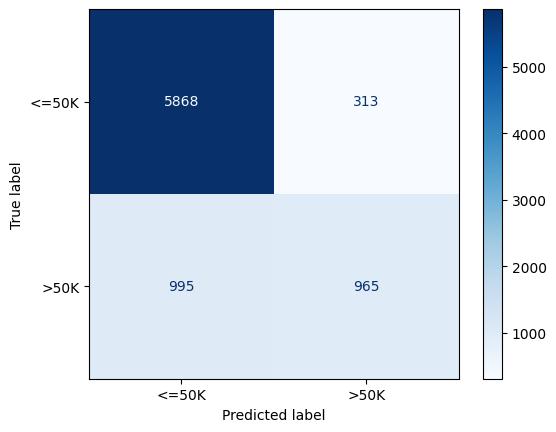

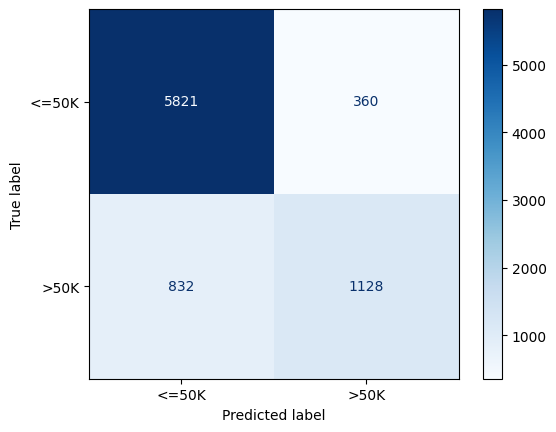

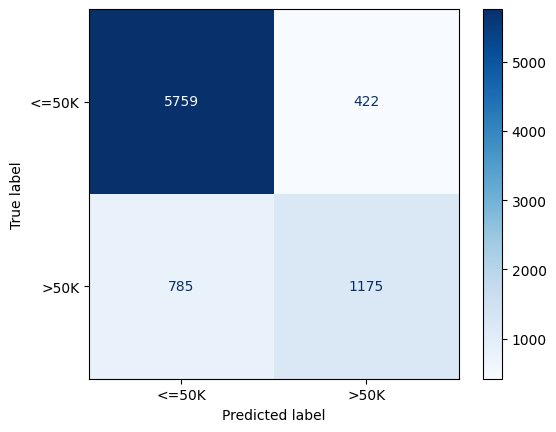

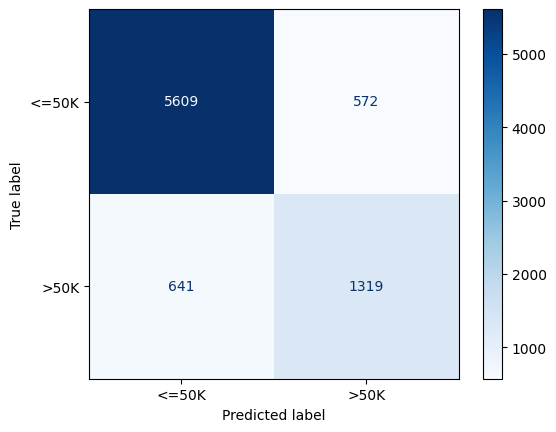

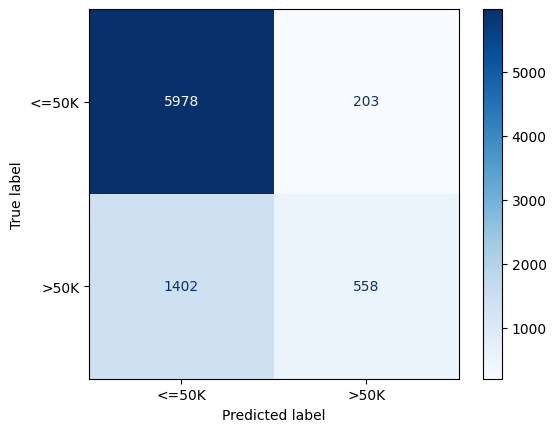

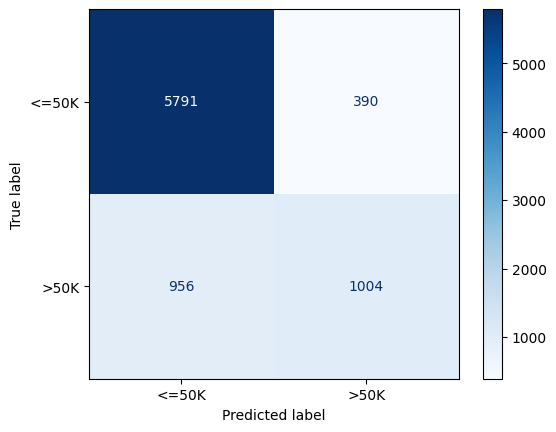

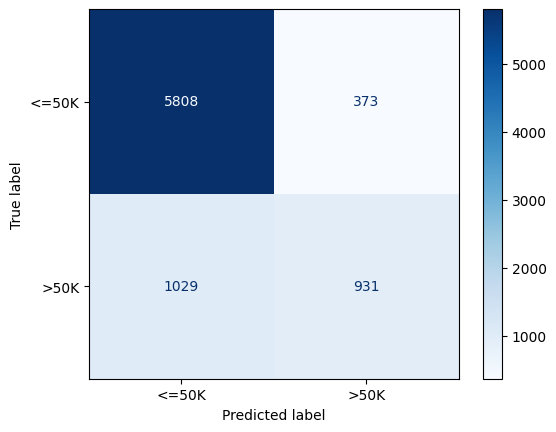

In [30]:
print("Arbre", ConfusionMatrixDisplay.from_predictions(y_test,y_pred_tree,
                                        cmap=plt.cm.Blues,
                                        display_labels=["<=50K",">50K"]))

print("Forest", ConfusionMatrixDisplay.from_predictions(y_test,y_pred_forest,
                                        cmap=plt.cm.Blues,
                                        display_labels=["<=50K",">50K"]))

print("Adaboost", ConfusionMatrixDisplay.from_predictions(y_test,y_pred_ada,
                                        cmap=plt.cm.Blues,
                                        display_labels=["<=50K",">50K"]))

print("KNN", ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn,
                                        cmap=plt.cm.Blues,
                                        display_labels=["<=50K",">50K"]))

print("SVC", ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc,
                                        cmap=plt.cm.Blues,
                                        display_labels=["<=50K",">50K"]))

print("Régression Logistique", ConfusionMatrixDisplay.from_predictions(y_test,y_pred_log,
                                        cmap=plt.cm.Blues,
                                        display_labels=["<=50K",">50K"]))

print("Réseaux de neurones", ConfusionMatrixDisplay.from_predictions(y_test,y_pred_mlp,
                                        cmap=plt.cm.Blues,
                                        display_labels=["<=50K",">50K"]))

Courbes de ROC

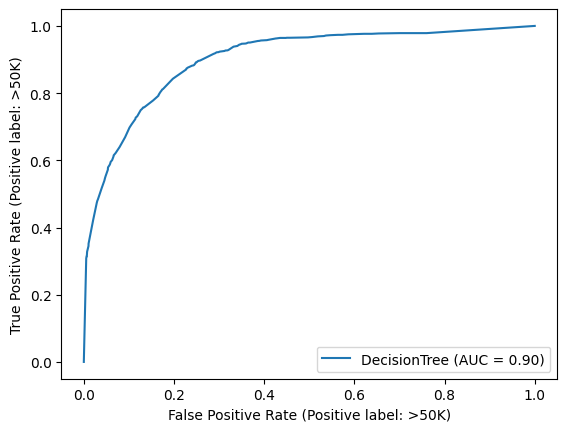

In [58]:
RocCurveDisplay.from_estimator(tree, X_test_encoded, y_test, name="DecisionTree")

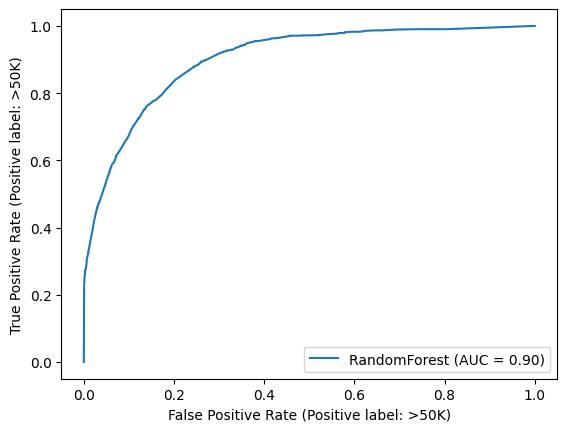

In [56]:
RocCurveDisplay.from_estimator(forest, X_test_encoded, y_test, name="RandomForest")

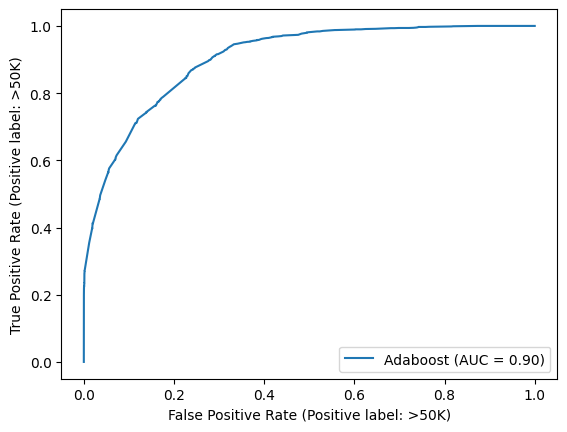

In [52]:
RocCurveDisplay.from_estimator(ada, X_test_encoded, y_test, name="Adaboost")

Feature importances avec RandomForestClassifier

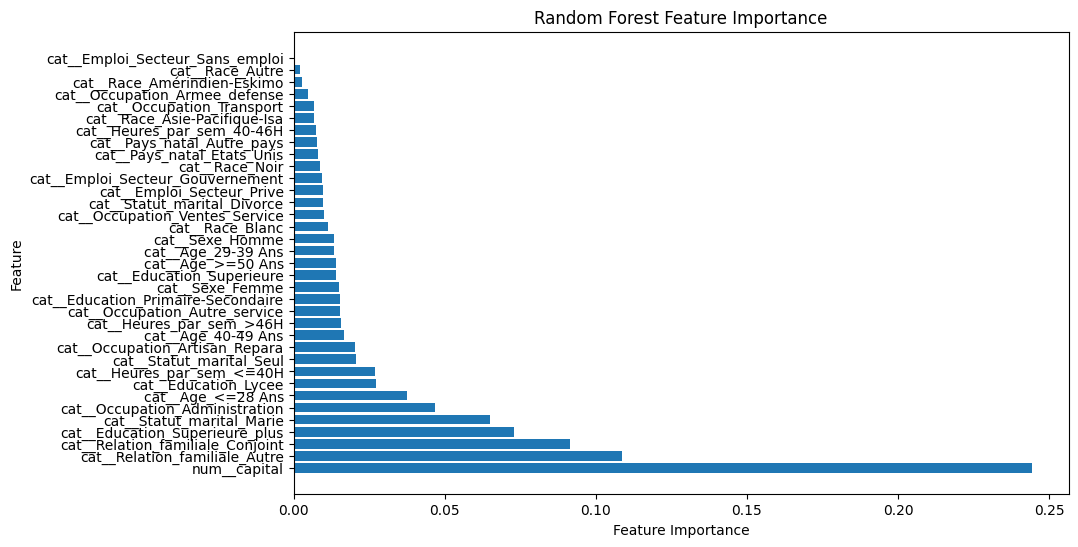

In [18]:
forest = RandomForestClassifier()
forest.fit(X_train_encoded, y_train)

feature_importances = forest.feature_importances_

feature_names = np.array(preprocessor.get_feature_names_out())

indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()

Affichage des arbres

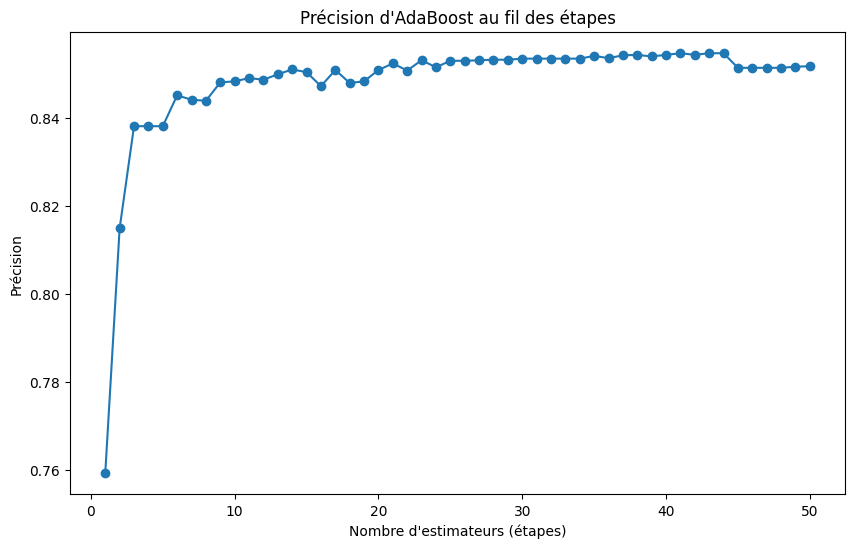

In [12]:
#tree=DecisionTreeClassifier(max_depth= 3, min_samples_leaf=3 , min_samples_split=8)
#tree.fit(X_train_encoded, y_train)
#plt.figure(figsize=(30,20)) #parameters: figsize, dpi
#plot_tree(tree, filled=True) #parameters: filled, class_names, feature_names
#plt.show()

adaboost_model = AdaBoostClassifier()

# Adapter le modèle aux données
adaboost_model.fit(X_train_encoded, y_train)

# Obtenir les scores à chaque étape de l'entraînement
scores = list(adaboost_model.staged_score(X_test_encoded, y_test))

# Tracer la précision au fil des étapes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o')
plt.xlabel('Nombre d\'estimateurs (étapes)')
plt.ylabel('Précision')
plt.title('Précision d\'AdaBoost au fil des étapes')
plt.show()